# ***Sales Prediction Based on Advertisement Spending***

---



# **Importing the libraries**

We will start the task at hand by importing the important libraries.

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **Importing the dataset**

Here, we are uploading the dataset which is in the form of a csv file.



In [84]:
ds=pd.read_csv("advertising.csv")

# **Missing Data**

In [85]:
missing_values = ds.isnull().sum()
missing_percentage = (ds.isnull().sum() / len(ds)) * 100
missing = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing)

           Missing Values  Percentage
TV                      0         0.0
Radio                   0         0.0
Newspaper               0         0.0
Sales                   0         0.0


We have no null values in the dataset.

# **Duplicate Values**

In [86]:
dup = ds.duplicated().sum()
print('Number of duplicated rows:', dup)

Number of duplicated rows: 0


# **Exploratory Data Analysi**s



## Basic Statistical Analysis

In [87]:
ds.head(n=10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [88]:
ds.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [89]:
ds.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


## Correlation Heatmap

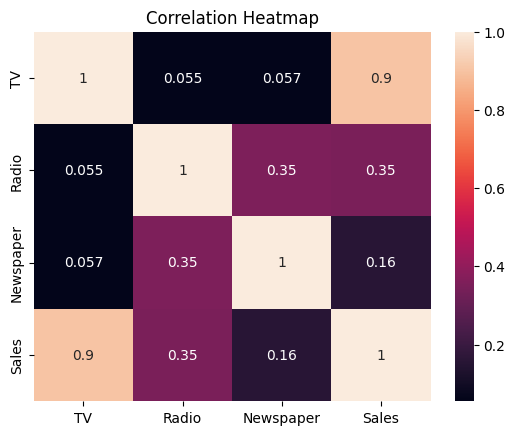

In [90]:
sns.heatmap(ds.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

- We observe that TV advertisements and Sales are highly correlated.
- Increase in TV ads can increase the number of sales.
- We can also infer that most effective factor of sales is TV.

## Pair Plot

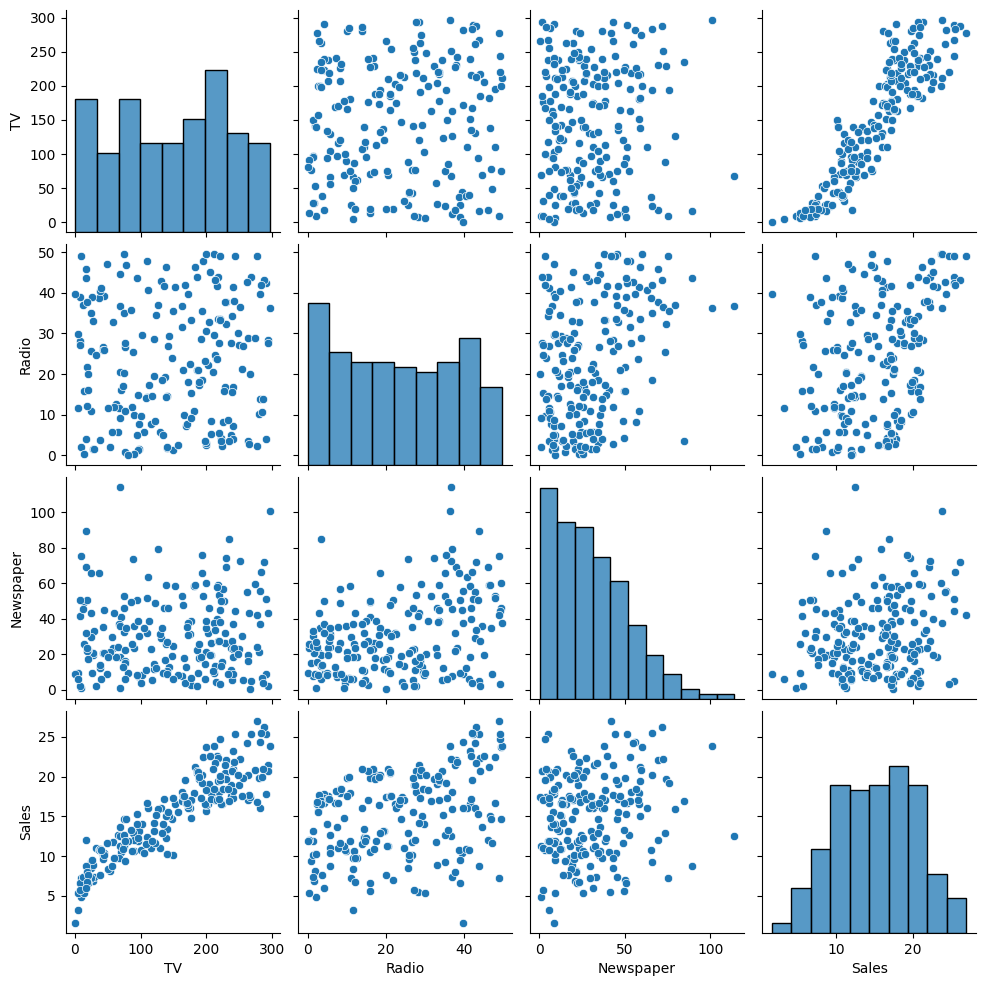

In [91]:
sns.pairplot(ds, height = 2.5)
plt.show()

Observations:-
* TV ads seem to have a big impact on sales, showing a clear positive relationship.
* Radio ads also seem to affect sales in a positive way, but not as strongly as TV ads.
* Newspaper ads don't seem to have much of an impact on sales, as the data points are randomly scattered.

 #  **Data Preprocessing**

Data preprocessing is crucial for preparing the dataset for modeling. This step involves handling missing values, dealing with outliers, converting categorical variables into numerical format, etc. Data cleaning ensures that the dataset is ready for analysis and modeling.



## Splitting the data into test set and training set

First, we will be splitting the dataset into the independent variable matrix (**X**) and dependent variable vector (**y**).

**y** consists of the target variable which is 'Sales' & **X** will consist of all the remaining columns in the dataset.

In [92]:
X=ds.iloc[:,0:-1].values
y=ds.iloc[:,-1].values

Independent Variable Matrix

In [93]:
Xprint=pd.DataFrame(X)
Xprint.columns=['TV', 'Radio', 'Newspaper']
Xprint.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


Target Variable

In [94]:
yprint=pd.DataFrame(y)
yprint.columns=['Sales']
yprint.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

## Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Model Training

With the preprocessed dataset, we proceed to select machine learning models for regression. We train various models (e.g. Multiple Linear Regression, Decision Tree Regression, Random Forest Regression and Support Vector Regression), and evaluate their performance using metrics like MSE and R-square.

## Multiple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_mlr= LinearRegression()
regressor_mlr.fit(X_train, y_train)

Predicting Test Set Results

In [98]:
y_test_pred_mlr = regressor_mlr.predict(X_test)

Comparing Actual Sales With Predicted Sales

In [99]:
np.set_printoptions(precision=2)
print(np.concatenate((y_test_pred_mlr.reshape(len(y_test_pred_mlr),1), y_test.reshape(len(y_test),1)),1))

[[ 9.36  8.  ]
 [ 6.95  7.2 ]
 [10.82 10.4 ]
 [13.01 13.3 ]
 [15.79 17.5 ]
 [11.05 11.8 ]
 [19.46 20.9 ]
 [22.73 20.8 ]
 [21.33 19.8 ]
 [21.45 16.1 ]
 [ 9.42 12.  ]
 [11.5  12.  ]
 [19.31 17.  ]
 [24.97 27.  ]
 [11.08 10.4 ]
 [13.29 15.5 ]
 [14.84 15.2 ]
 [23.49 24.2 ]
 [10.54 13.7 ]
 [18.02 19.6 ]
 [21.21 20.  ]
 [ 8.66 12.6 ]
 [13.71 14.6 ]
 [24.28 24.4 ]
 [19.21 20.7 ]
 [15.82 16.4 ]
 [ 9.89  9.5 ]
 [16.88 16.9 ]
 [11.33 12.3 ]
 [13.16 14.  ]
 [13.67 12.9 ]
 [12.3  14.  ]
 [10.44 10.6 ]
 [15.44 15.9 ]
 [10.72 10.9 ]
 [ 8.56  8.5 ]
 [18.14 20.9 ]
 [20.76 23.7 ]
 [10.07 14.  ]
 [17.02 16.6 ]]


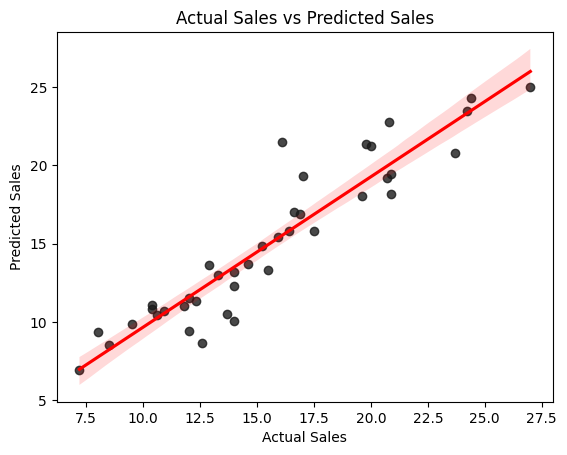

In [100]:
sns.regplot(x = y_test, y = y_test_pred_mlr,color=".1", line_kws=dict(color="r"), data = ds)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

Model Performance Metrics

In [101]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_mlr))

Mean Squared Error: 3.375668716507917


In [102]:
print('R²:', r2_score(y_test, y_test_pred_mlr))

R²: 0.8533464079047823


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train, y_train)

Predicting Test Set Results

In [104]:
y_test_pred_dt=regressor_dt.predict(X_test)

Comparing Actual Sales With Predicted Sales

In [105]:
np.set_printoptions(precision=2)
print(np.concatenate((y_test_pred_dt.reshape(len(y_test_pred_dt),1), y_test.reshape(len(y_test),1)),1))

[[ 9.2  8. ]
 [ 6.9  7.2]
 [11.6 10.4]
 [17.3 13.3]
 [16.5 17.5]
 [10.1 11.8]
 [19.8 20.9]
 [20.2 20.8]
 [17.6 19.8]
 [20.7 16.1]
 [ 9.4 12. ]
 [12.6 12. ]
 [17.7 17. ]
 [25.4 27. ]
 [10.1 10.4]
 [18.  15.5]
 [17.3 15.2]
 [25.4 24.2]
 [11.9 13.7]
 [21.2 19.6]
 [20.9 20. ]
 [ 9.7 12.6]
 [13.6 14.6]
 [22.1 24.4]
 [21.2 20.7]
 [16.5 16.4]
 [ 8.8  9.5]
 [16.5 16.9]
 [12.4 12.3]
 [14.2 14. ]
 [13.2 12.9]
 [11.9 14. ]
 [11.6 10.6]
 [16.  15.9]
 [10.8 10.9]
 [ 9.2  8.5]
 [16.6 20.9]
 [23.8 23.7]
 [11.9 14. ]
 [15.6 16.6]]


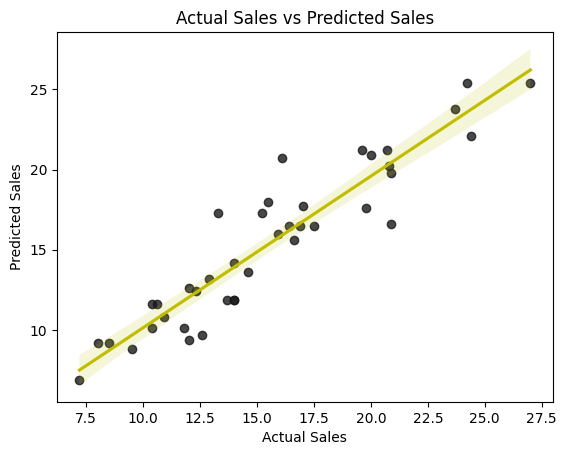

In [106]:
sns.regplot(x = y_test, y = y_test_pred_dt,color=".1", line_kws=dict(color="y"), data = ds)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

Model Performance Metrics

In [107]:
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_dt))

Mean Squared Error: 3.1244999999999985


In [108]:
print('R²:', r2_score(y_test, y_test_pred_dt))

R²: 0.8642582590345155


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)
regressor_rf.fit(X_train, y_train)

Predicting Test Set Results

In [110]:
y_test_pred_rf=regressor_rf.predict(X_test)

Comparing Actual Sales With Predicted Sales

In [111]:
np.set_printoptions(precision=2)
print(np.concatenate((y_test_pred_rf.reshape(len(y_test_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[ 7.93  8.  ]
 [ 7.33  7.2 ]
 [11.51 10.4 ]
 [13.96 13.3 ]
 [17.08 17.5 ]
 [10.45 11.8 ]
 [19.86 20.9 ]
 [19.92 20.8 ]
 [19.03 19.8 ]
 [20.01 16.1 ]
 [10.96 12.  ]
 [12.31 12.  ]
 [17.39 17.  ]
 [25.37 27.  ]
 [10.77 10.4 ]
 [14.84 15.5 ]
 [14.45 15.2 ]
 [24.97 24.2 ]
 [11.48 13.7 ]
 [20.75 19.6 ]
 [19.4  20.  ]
 [ 9.36 12.6 ]
 [13.8  14.6 ]
 [23.09 24.4 ]
 [22.23 20.7 ]
 [16.44 16.4 ]
 [ 9.01  9.5 ]
 [17.04 16.9 ]
 [11.82 12.3 ]
 [13.91 14.  ]
 [12.63 12.9 ]
 [11.43 14.  ]
 [11.31 10.6 ]
 [15.09 15.9 ]
 [10.6  10.9 ]
 [ 8.22  8.5 ]
 [18.58 20.9 ]
 [23.15 23.7 ]
 [11.48 14.  ]
 [16.42 16.6 ]]


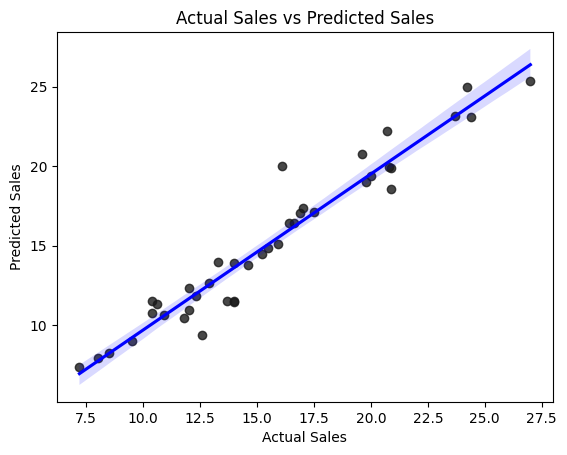

In [112]:
sns.regplot(x = y_test, y = y_test_pred_rf,color=".1", line_kws=dict(color="b"), data = ds)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

Model Performance Metrics

In [113]:
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_dt))

Mean Squared Error: 3.1244999999999985


In [114]:
print('R²:', r2_score(y_test, y_test_pred_dt))

R²: 0.8642582590345155


## Support Vector Regression

Scaling the Dependent Variable Vector

In [115]:
y_train_svr=y_train.reshape(len(y_train),1)
sc_y=StandardScaler()
y_train_svr= sc_y.fit_transform(y_train_svr)

Training the Model

In [ ]:
from sklearn.svm import SVR
regressor_svr= SVR(kernel = 'rbf')
regressor_svr.fit(X_train, y_train_svr)

Predicting Test Set Results

In [117]:
y_test_pred_svr=sc_y.inverse_transform(regressor_svr.predict(X_test).reshape(-1, 1))

Comparing Actual Sales With Predicted Sales

In [118]:
np.set_printoptions(precision=2)
print(np.concatenate((y_test_pred_svr.reshape(len(y_test_pred_svr),1), y_test.reshape(len(y_test),1)),1))

[[ 8.35  8.  ]
 [ 6.83  7.2 ]
 [10.68 10.4 ]
 [12.86 13.3 ]
 [15.95 17.5 ]
 [10.51 11.8 ]
 [19.05 20.9 ]
 [21.09 20.8 ]
 [19.67 19.8 ]
 [19.46 16.1 ]
 [ 9.58 12.  ]
 [11.3  12.  ]
 [18.01 17.  ]
 [25.59 27.  ]
 [10.66 10.4 ]
 [14.09 15.5 ]
 [14.91 15.2 ]
 [24.41 24.2 ]
 [11.33 13.7 ]
 [19.36 19.6 ]
 [19.01 20.  ]
 [ 8.57 12.6 ]
 [14.13 14.6 ]
 [24.18 24.4 ]
 [20.9  20.7 ]
 [15.85 16.4 ]
 [ 9.03  9.5 ]
 [16.57 16.9 ]
 [11.42 12.3 ]
 [13.05 14.  ]
 [13.89 12.9 ]
 [13.04 14.  ]
 [10.34 10.6 ]
 [15.03 15.9 ]
 [ 9.95 10.9 ]
 [ 7.85  8.5 ]
 [17.72 20.9 ]
 [22.15 23.7 ]
 [11.   14.  ]
 [16.88 16.6 ]]


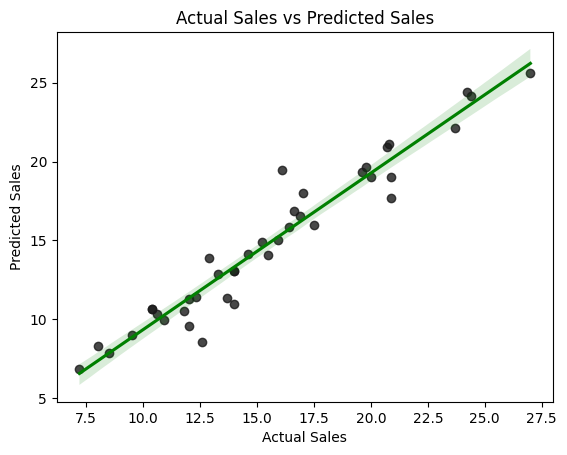

In [119]:
sns.regplot(x = y_test, y = y_test_pred_svr,color=".1", line_kws=dict(color="g"), data = ds)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

Model Performance Metrics

In [120]:
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_svr))

Mean Squared Error: 2.0502953032715743


In [121]:
print('R²:', r2_score(y_test, y_test_pred_svr))

R²: 0.9109263389472109


# **Model Comparison**

In [122]:
models= ['Multiple Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Support Vector Regression']
MSEs=[mean_squared_error(y_test, y_test_pred_mlr),mean_squared_error(y_test, y_test_pred_dt),mean_squared_error(y_test, y_test_pred_rf),mean_squared_error(y_test, y_test_pred_svr)]
Rscores=[r2_score(y_test, y_test_pred_mlr),r2_score(y_test, y_test_pred_dt),r2_score(y_test, y_test_pred_rf),r2_score(y_test, y_test_pred_svr)]
metrics_table=pd.DataFrame({'Model':models,'MSE':MSEs,'R²':Rscores})
metrics_table

,Model,MSE,R²
0,Multiple Linear Regression,3.375669,0.853346
1,Decision Tree Regression,3.124500,0.864258
2,Random Forest Regression,1.738237,0.924483
3,Support Vector Regression,2.050295,0.910926


# **Conclusion**

We can safely conclude that the best results were obtained from the **Random Forest Regression Model** due to the following factors:-

* **Lowest Mean Squared Error (MSE)**:
The model exhibited the lowest MSE of 1.74, indicating minimal prediction errors and a strong fit to the data.
* **Highest R²**:
With an R² score of 0.92, Random Forest Regression explained a substantial portion of the variance in the target variable, suggesting a highly reliable model.
* **Excellent Model Fit**:
The R² score, approaching 1, is a clear indicator of a strong model fit, implying that the model can accurately estimate the target variable based on the given features.

